In [1]:
import pandas as pd
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

In [2]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='median')
df["Age"] = df["Age"].reshape(1,-1)

AttributeError: 'Series' object has no attribute 'reshape'

In [11]:
df['Age'] = si.fit_transform(df[['Age']])

In [12]:
df['Cabin'] = df["Cabin"].fillna("Unknown")

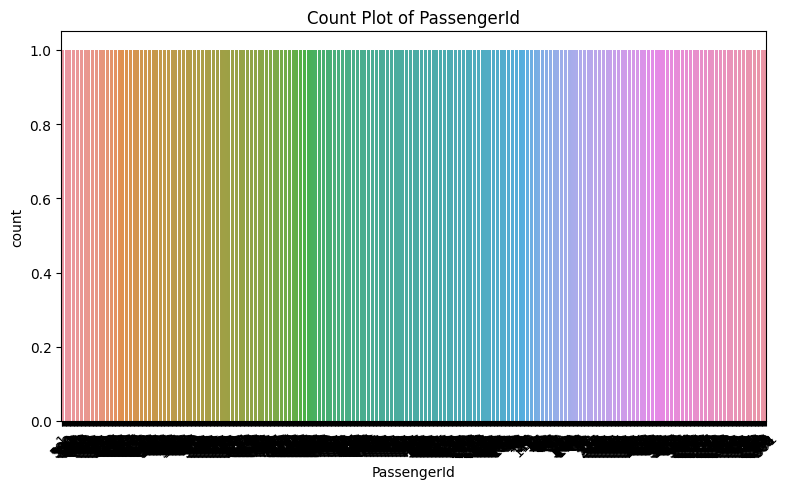

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='PassengerId', order=df['PassengerId'].value_counts().index)
plt.title('Count Plot of PassengerId')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
ps = []
for i in range(len(df)):
    if df['Survived'][i] == 1 and df['Sex'][i] == 'female':
        ps.append(df['PassengerId'][i])


In [26]:
ps

[2,
 3,
 4,
 9,
 10,
 11,
 12,
 16,
 20,
 23,
 26,
 29,
 32,
 33,
 40,
 44,
 45,
 48,
 53,
 54,
 57,
 59,
 62,
 67,
 69,
 80,
 83,
 85,
 86,
 89,
 99,
 107,
 110,
 124,
 129,
 134,
 137,
 142,
 143,
 152,
 157,
 162,
 167,
 173,
 185,
 187,
 191,
 193,
 195,
 196,
 199,
 209,
 212,
 216,
 217,
 219,
 231,
 234,
 238,
 242,
 248,
 256,
 257,
 258,
 259,
 260,
 269,
 270,
 273,
 275,
 276,
 280,
 290,
 291,
 292,
 300,
 301,
 304,
 307,
 308,
 310,
 311,
 312,
 316,
 317,
 319,
 320,
 323,
 324,
 326,
 328,
 329,
 330,
 331,
 335,
 338,
 342,
 346,
 347,
 348,
 357,
 359,
 360,
 367,
 368,
 369,
 370,
 376,
 377,
 381,
 382,
 384,
 388,
 390,
 394,
 395,
 400,
 413,
 417,
 418,
 427,
 428,
 432,
 433,
 436,
 438,
 441,
 444,
 447,
 449,
 458,
 459,
 470,
 473,
 474,
 480,
 484,
 487,
 497,
 505,
 507,
 514,
 517,
 519,
 521,
 524,
 527,
 531,
 534,
 536,
 538,
 540,
 541,
 547,
 555,
 557,
 559,
 560,
 572,
 574,
 577,
 578,
 581,
 582,
 586,
 592,
 597,
 601,
 609,
 610,
 613,
 616,
 61

In [27]:
len(ps)

233

In [37]:
ss = []
for i in range(len(df)):
    if df['Pclass'][i] == 3 and df['Age'][i] < 18:
        ss.append(df['PassengerId'][i])


In [29]:
df.Pclass.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [38]:
print(f'The number of passenger who are 3rd class and age less than 18 are: {len(ss)}')

The number of passenger who are 3rd class and age less than 18 are: 78


In [39]:
es = []
for i in range(len(df)):
    if df['Pclass'][i] == 1 and df['Age'][i] > 40:
        es.append(df['PassengerId'][i])


In [40]:
print(f'The number of passenger who are 1st class and age more than 40 are: {len(es)}')

The number of passenger who are 1st class and age more than 40 are: 76


In [41]:
print(es)

[7, 12, 36, 53, 55, 63, 93, 97, 111, 125, 156, 171, 175, 178, 188, 195, 196, 246, 253, 263, 269, 276, 300, 332, 338, 340, 367, 381, 435, 439, 450, 454, 457, 461, 463, 468, 488, 493, 494, 497, 514, 516, 524, 537, 545, 546, 556, 557, 572, 588, 592, 600, 622, 626, 631, 646, 648, 660, 661, 663, 695, 699, 708, 713, 746, 766, 780, 790, 797, 821, 830, 857, 858, 863, 872, 880]


In [42]:
rs = []
for i in range(len(df)):
    if df['Survived'][i] ==1:
        rs.append(df['PassengerId'][i])
print(rs)

[2, 3, 4, 9, 10, 11, 12, 16, 18, 20, 22, 23, 24, 26, 29, 32, 33, 37, 40, 44, 45, 48, 53, 54, 56, 57, 59, 62, 66, 67, 69, 75, 79, 80, 82, 83, 85, 86, 89, 98, 99, 107, 108, 110, 124, 126, 128, 129, 134, 137, 142, 143, 147, 152, 157, 162, 166, 167, 173, 184, 185, 187, 188, 191, 193, 194, 195, 196, 199, 205, 208, 209, 210, 212, 216, 217, 219, 221, 225, 227, 231, 234, 238, 242, 248, 249, 256, 257, 258, 259, 260, 262, 268, 269, 270, 272, 273, 275, 276, 280, 284, 287, 289, 290, 291, 292, 299, 300, 301, 302, 304, 306, 307, 308, 310, 311, 312, 316, 317, 319, 320, 323, 324, 326, 328, 329, 330, 331, 335, 338, 339, 341, 342, 346, 347, 348, 349, 357, 359, 360, 367, 368, 369, 370, 371, 376, 377, 381, 382, 384, 388, 390, 391, 392, 394, 395, 400, 401, 408, 413, 415, 417, 418, 427, 428, 430, 431, 432, 433, 436, 438, 441, 444, 445, 446, 447, 448, 449, 450, 454, 456, 458, 459, 461, 470, 473, 474, 480, 484, 485, 487, 490, 497, 505, 507, 508, 510, 511, 513, 514, 517, 519, 521, 524, 527, 531, 534, 536, 538,

In [45]:
 es = []
for i in range(len(df)):
    if df['Sex'][i] == 'male' and df['Fare'][i] > 100:
        es.append(df['PassengerId'][i])
print(es)

[28, 119, 306, 333, 374, 378, 391, 439, 506, 528, 545, 551, 558, 660, 661, 680, 699, 738, 803]


In [46]:
df.Embarked.head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [48]:
es = []
for i in range(len(df)):
    if df['Embarked'][i] == 'C' and df['Pclass'][i] == 2:
        es.append(df['PassengerId'][i])
print(es)

[10, 44, 123, 136, 182, 293, 309, 362, 390, 474, 548, 609, 686, 818, 828, 867, 875]


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
es = []
for i in range(len(df)):
    if df['SibSp'][i] > 2:
        es.append(df['PassengerId'][i])
print(es)

[8, 17, 25, 28, 51, 60, 64, 69, 72, 86, 89, 120, 160, 165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788, 793, 814, 820, 825, 847, 851, 864]


In [52]:
es = []
for i in range(len(df)):
    if df['Parch'][i] == 0 and df['SibSp'][i] == 0:
        es.append(df['PassengerId'][i])
print(es)

[3, 5, 6, 7, 12, 13, 15, 16, 18, 20, 21, 22, 23, 24, 27, 29, 30, 31, 33, 34, 37, 38, 43, 45, 46, 48, 52, 56, 57, 58, 61, 62, 65, 67, 68, 71, 73, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 88, 90, 91, 92, 95, 96, 97, 101, 102, 104, 106, 107, 108, 109, 111, 113, 115, 116, 117, 122, 124, 127, 128, 130, 131, 132, 135, 136, 139, 140, 142, 144, 145, 147, 150, 151, 153, 155, 157, 158, 159, 162, 163, 164, 169, 170, 171, 174, 175, 178, 179, 180, 182, 186, 188, 190, 191, 192, 195, 196, 197, 199, 200, 201, 203, 204, 205, 208, 209, 210, 211, 212, 213, 214, 217, 219, 220, 221, 222, 223, 224, 226, 227, 228, 229, 232, 233, 235, 236, 239, 240, 243, 244, 245, 247, 251, 253, 257, 258, 259, 261, 264, 265, 266, 270, 271, 272, 275, 277, 278, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 293, 294, 295, 296, 297, 299, 301, 303, 304, 305, 307, 310, 311, 314, 316, 318, 321, 322, 323, 326, 327, 328, 332, 336, 338, 339, 340, 343, 344, 345, 346, 347, 350, 351, 352, 355, 356, 358, 359, 360, 364, 366, 368, 36

In [53]:
survived_df = df[df['Survived'] == 1]

survived_df = survived_df.dropna(subset=['Age'])

oldest_survivors = survived_df.sort_values(by='Age', ascending=False).head(5)

print(oldest_survivors[['PassengerId', 'Age', 'Survived', 'Name']])  # add Name if available


     PassengerId   Age  Survived                                       Name
630          631  80.0         1       Barkworth, Mr. Algernon Henry Wilson
483          484  63.0         1                     Turkula, Mrs. (Hedwig)
275          276  63.0         1          Andrews, Miss. Kornelia Theodosia
570          571  62.0         1                         Harris, Mr. George
829          830  62.0         1  Stone, Mrs. George Nelson (Martha Evelyn)
